In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import json, csv
plt.style.use('bmh')

# Necessary Modules

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import module and function for CPC data extraction
from Module_CPC import *

# import functions for FTIR extraction and analysis
from Module_FTIR import All_Absorbance_Analysis, ShoowAllCorrectedAbsorbances

# For Image Analysis
from RGB_Collection_area import GetDiameterFromImage

# For final computation for aeral densities 
from Module_Computations import Particles2Absorbances

# Initial Elements

In [4]:
# Get the base folder for the compound
data_path = os.path.join("Data", "Glucose")
if not os.path.exists(data_path) or not os.path.isdir(data_path):
    raise NotADirectoryError(f"Data path is not a valid directory: {data_path}")

# Folder for the CPC files 
CPC_folder_path = os.path.join(data_path, "CPCData")
if not os.path.exists(CPC_folder_path) or not os.path.isdir(CPC_folder_path):
    raise NotADirectoryError(f"CPCData folder is not a valid directory: {CPC_folder_path}")

# Folder for the FTIR files
FTIR_folder_path = os.path.join(data_path, "FTIRData")
if not os.path.exists(FTIR_folder_path) or not os.path.isdir(FTIR_folder_path):
    raise NotADirectoryError(f"FTIRData folder is not a valid directory: {FTIR_folder_path}")

# Folder for the outputs
output_folder = os.path.join(data_path, "OUTPUT-new")
if not os.path.exists(output_folder) or not os.path.isdir(output_folder):
    os.mkdir(output_folder)

# Read Excel

In [5]:
exp_excel_filename = os.path.join(data_path, "samples.xlsx")
exp_excel = pd.read_excel(exp_excel_filename)
exp_excel

Sample Material   dia       M   rho         Q  aperture  \
0        1     ZnSe  1000  180.16  1.56  5.944293      0.25   
1        1     ZnSe  1000  180.16  1.56  5.944293      0.50   
2        1     ZnSe  1000  180.16  1.56  5.944293      1.00   
3        1     ZnSe  1000  180.16  1.56  5.944293      1.50   
4        1     ZnSe  1000  180.16  1.56  5.944293      2.00   
..     ...      ...   ...     ...   ...       ...       ...   
79       7     ZnSe  1000  180.16  1.56  5.944293      3.50   
80       7     ZnSe  1000  180.16  1.56  5.944293      4.00   
81       7     ZnSe  1000  180.16  1.56  5.944293      5.00   
82       7     ZnSe  1000  180.16  1.56  5.944293      6.00   
83       7     ZnSe  1000  180.16  1.56  5.944293      8.00   

                                       FTIR_clean  \
0      20230512MagSulExp8ZnSeCleanAppInMm0.25.DPT   
1       20230512MagSulExp8ZnSeCleanAppInMm0.5.DPT   
2       20230512MagSulExp8ZnSeCleanAppInMm1.0.DPT   
3       20230512MagSulExp8ZnSeCleanAppInMm1.5.DPT   
4       20230512MagSulExp8ZnSeCleanAppInMm2.0.DPT   
..                                            ...   
79  20230516GlucoseExp7Cr2ZnSeCleanAppInMm3.5.DPT   
80  20230516GlucoseExp7Cr2ZnSeCleanAppInMm4.0.DPT   
81  20230516GlucoseExp7Cr2ZnSeCleanAppInMm5.0.DPT   
82  20230516GlucoseExp7Cr2ZnSeCleanAppInMm6.0.DPT   
83  20230516GlucoseExp7Cr2ZnSeCleanAppInMm8.0.DPT   

                                       FTIR_loaded             AIM_file  \
0      20230515GlucoseExp1Cr2LoadedAppInMm0.25.DPT  20230515Glucose.csv   
1       20230515GlucoseExp1Cr2LoadedAppInMm0.5.DPT  20230515Glucose.csv   
2       20230515GlucoseExp1Cr2LoadedAppInMm1.0.DPT  20230515Glucose.csv   
3       20230515GlucoseExp1Cr2LoadedAppInMm1.5.DPT  20230515Glucose.csv   
4       20230515GlucoseExp1Cr2LoadedAppInMm2.0.DPT  20230515Glucose.csv   
..                                             ...                  ...   
79  20230516GlucoseExp7Cr2ZnSeLoadedAppInMm3.5.DPT  20230516Glucose.csv   
80  20230516GlucoseExp7Cr2ZnSeLoadedAppInMm4.0.DPT  20230516Glucose.csv   
81  20230516GlucoseExp7Cr2ZnSeLoadedAppInMm5.0.DPT  20230516Glucose.csv   
82  20230516GlucoseExp7Cr2ZnSeLoadedAppInMm6.0.DPT  20230516Glucose.csv   
83  20230516GlucoseExp7Cr2ZnSeLoadedAppInMm8.0.DPT  20230516Glucose.csv   

                      IMAGE_File  cut_lower  cut_upper  \
0        20230515GlucoseExp1.jpg        171        200   
1        20230515GlucoseExp1.jpg        171        200   
2        20230515GlucoseExp1.jpg        171        200   
3        20230515GlucoseExp1.jpg        171        200   
4        20230515GlucoseExp1.jpg        171        200   
..                           ...        ...        ...   
79  20230516GlucoseExp7_3min.jpg        118        133   
80  20230516GlucoseExp7_3min.jpg        118        133   
81  20230516GlucoseExp7_3min.jpg        118        133   
82  20230516GlucoseExp7_3min.jpg        118        133   
83  20230516GlucoseExp7_3min.jpg        118        133   

                  Frog_File Frog_start Frog_stop  
0       20230515Glucose.txt      19min     48min  
1       20230515Glucose.txt      19min     48min  
2       20230515Glucose.txt      19min     48min  
3       20230515Glucose.txt      19min     48min  
4       20230515Glucose.txt      19min     48min  
..                      ...        ...       ...  
79  20230516GLUCOSEEXPS.txt       1h44      1h59  
80  20230516GLUCOSEEXPS.txt       1h44      1h59  
81  20230516GLUCOSEEXPS.txt       1h44      1h59  
82  20230516GLUCOSEEXPS.txt       1h44      1h59  
83  20230516GLUCOSEEXPS.txt       1h44      1h59  

[84 rows x 16 columns]

In [6]:
# check for consistency
if len(exp_excel["dia"].unique())>1:
    print("Expected only 1 diameter")
elif len(exp_excel["M"].unique())>1:
    print("Expected only 1 mass")
elif len(exp_excel["rho"].unique())>1:
    print("Expected only 1 rho")
else:
    print("Ok..")

Ok..


----
# Computation of the CPC Analysis

Processing experiment 1........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


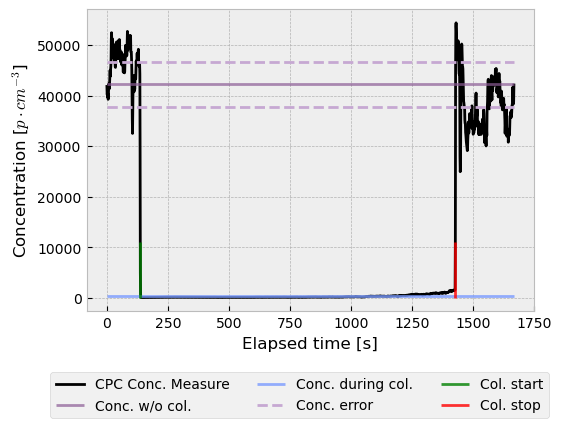

Processing experiment 2........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


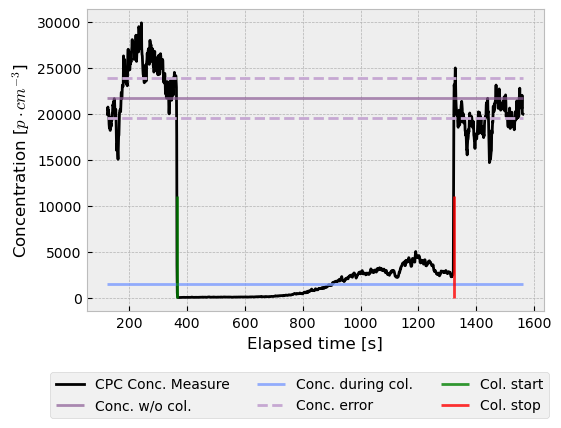

Processing experiment 3........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


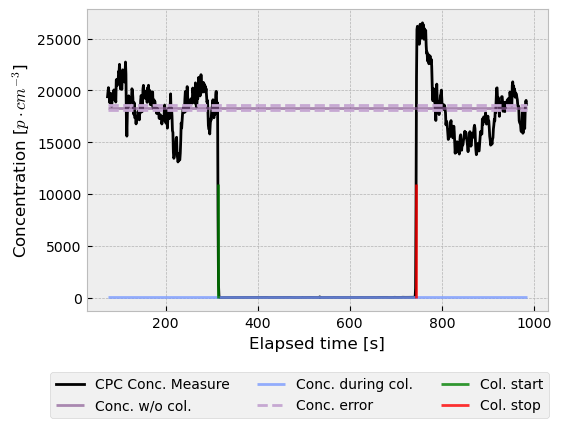

Processing experiment 4........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


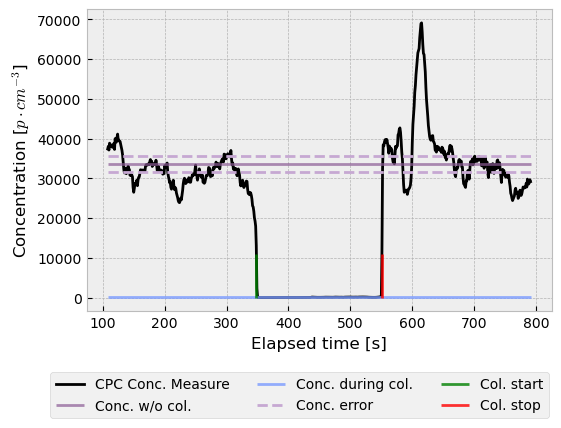

Processing experiment 5........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


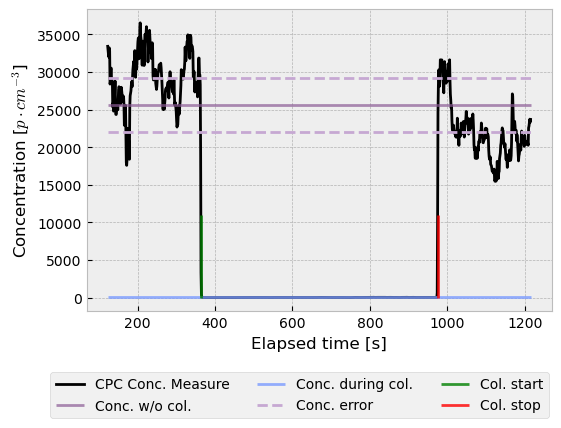

Processing experiment 6........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


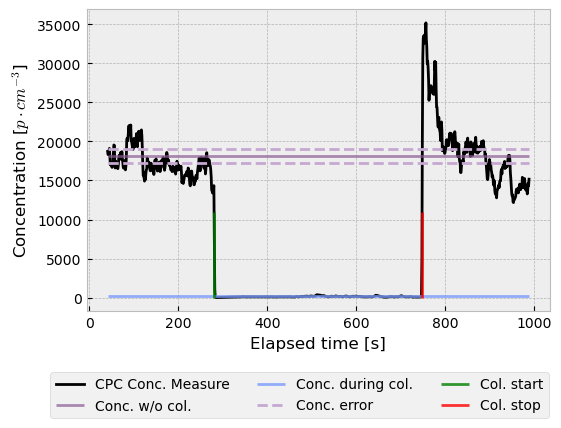

Processing experiment 7........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


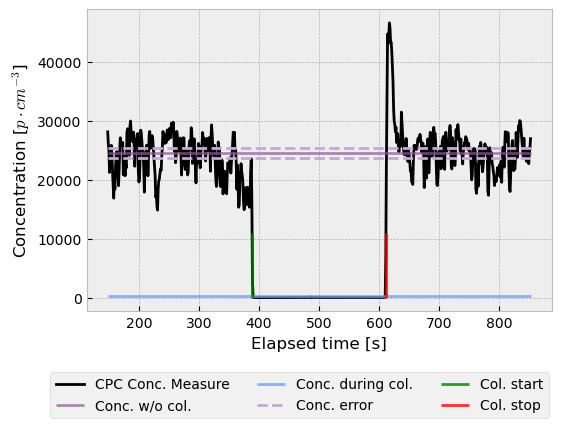

In [43]:
# variable to avoid unecessary repetitive data extraction
old_filename = None

for exp in exp_excel["Sample"].unique():
    print(f"Processing experiment {exp}........")
    rows = exp_excel[exp_excel["Sample"]==exp]

    filename_array =rows["AIM_file"].unique()
    start_exp = rows["cut_lower"].unique()
    end_exp = rows["cut_upper"].unique()

    if len(filename_array)>1:
        print(f"error, filename not unique for exp {exp}")
    else :
        filename = os.path.join(CPC_folder_path,filename_array[0])
    if len(start_exp)>1:
        print(f"error, lower cut number not correct for exp {exp}")
    else:
        start_exp = start_exp[0]
    if len(end_exp)>1:
        print(f"error, upper cut number not correct for exp {exp}")
    else:
        end_exp = end_exp[0]

    if not filename==old_filename:
        AmmSulCPCFile = CPC_File(filename)
        old_filename = filename

    ExpConc = AmmSulCPCFile.extract_experiment_conc(start_sample=start_exp, end_sample=end_exp)
    C_before, C_after, C_base, C_error, C_collection, C_time = AnalyseExpConcTruncated(ExpConc, peak_height=1500, expName = "Exp"+str(exp), output_folder = output_folder)

    results = {'Filename': filename,
               'Experiment Number': exp,
               'Start sample': start_exp,
               'End sample': end_exp,
               'Concentration before': C_before,
               'Concentration after': C_after,
               'Concentration base (mean)': C_base,
               'Concentration error (deviation)': C_error,
               'Concentration collection (mean)': C_collection,
               'Collection time (sec)': C_time,
               'Total collection (part per cm3)': (C_base-C_collection)*C_time,
               'Total collection error (part per cm3)': C_error * C_time}

    # Open a new CSV file for writing
    with open(os.path.join(output_folder,f'Exp{exp}CPCMeasuresResults.csv'), 'w', newline='') as csvfile:
        # Define the field names for the CSV file
        fieldnames = list(results.keys())

        # Create a writer object for the CSV file and write the header row
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Write the data rows to the CSV file
        writer.writerow(results)

# FTIR extraction and Analysis

Processing experiment 1........
saved fig to ... Data\Glucose\OUTPUT-new\FTIR_comparison_Exp1_deg4.png
saved results to ... Data\Glucose\OUTPUT-new\Exp1FTIRResults.csv and Data\Glucose\OUTPUT-new\Exp1FTIRResults.json
Processing experiment 2........
saved fig to ... Data\Glucose\OUTPUT-new\FTIR_comparison_Exp2_deg4.png
saved results to ... Data\Glucose\OUTPUT-new\Exp2FTIRResults.csv and Data\Glucose\OUTPUT-new\Exp2FTIRResults.json
Processing experiment 3........
saved fig to ... Data\Glucose\OUTPUT-new\FTIR_comparison_Exp3_deg4.png
saved results to ... Data\Glucose\OUTPUT-new\Exp3FTIRResults.csv and Data\Glucose\OUTPUT-new\Exp3FTIRResults.json
Processing experiment 4........
saved fig to ... Data\Glucose\OUTPUT-new\FTIR_comparison_Exp4_deg4.png
saved results to ... Data\Glucose\OUTPUT-new\Exp4FTIRResults.csv and Data\Glucose\OUTPUT-new\Exp4FTIRResults.json
Processing experiment 5........
saved fig to ... Data\Glucose\OUTPUT-new\FTIR_comparison_Exp5_deg4.png
saved results to ... Data\Glu

True

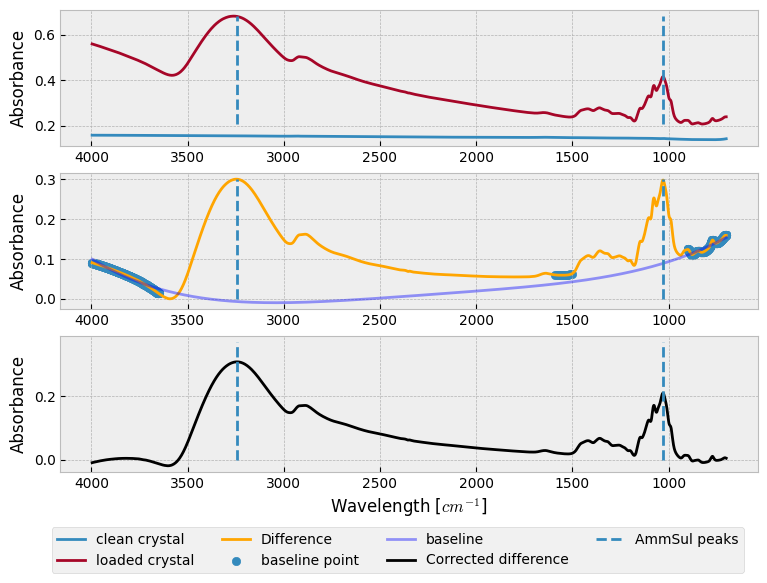

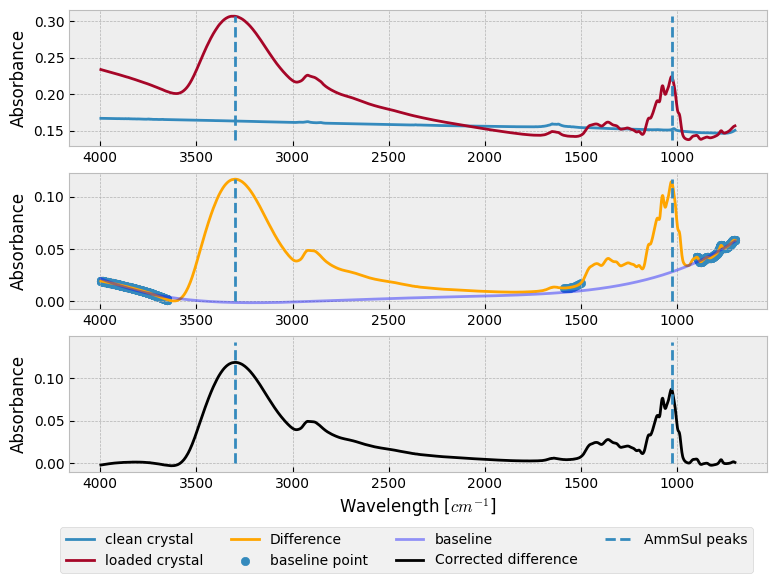

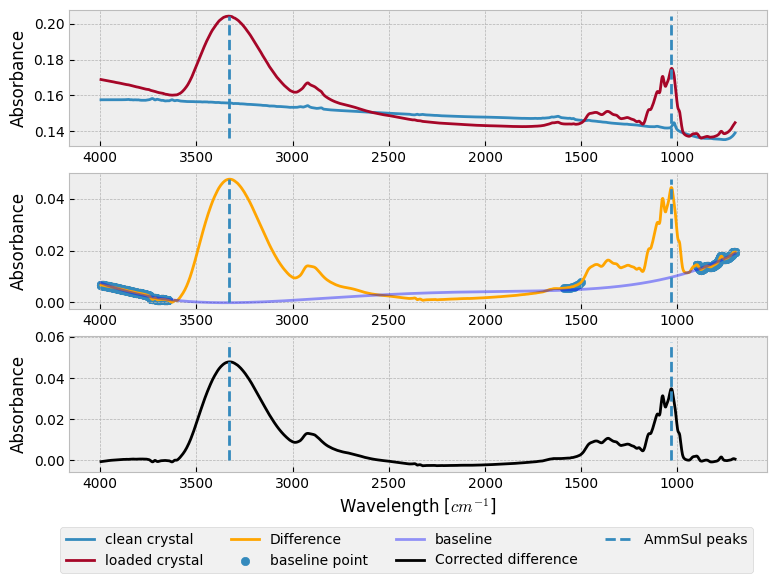

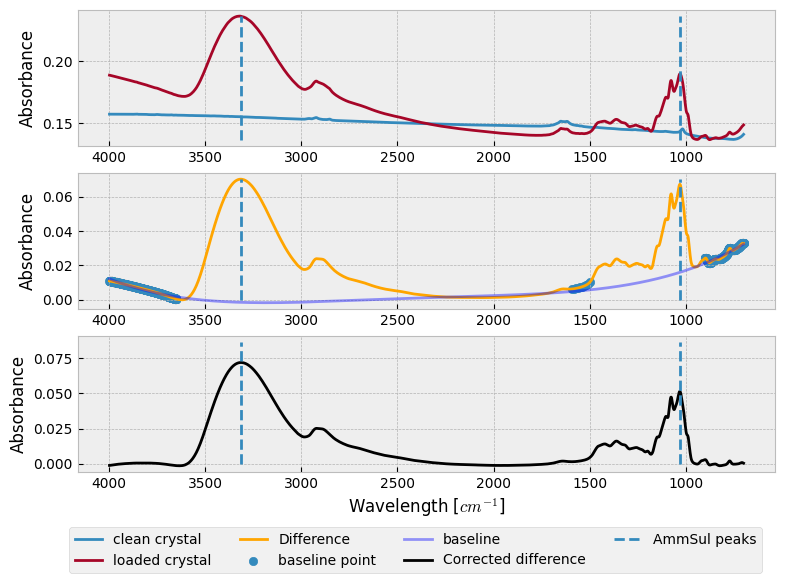

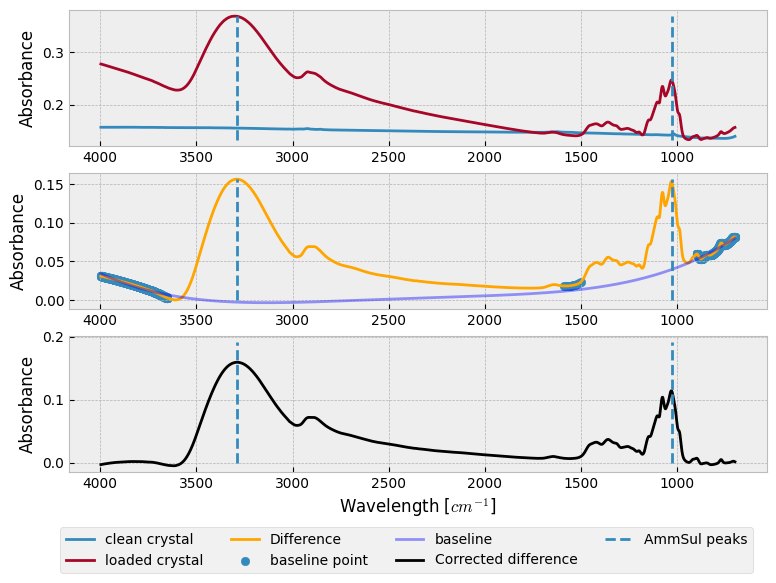

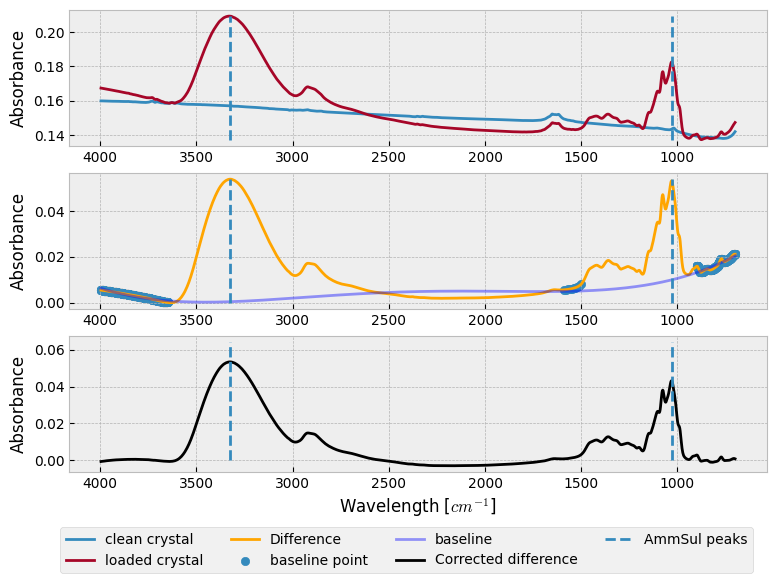

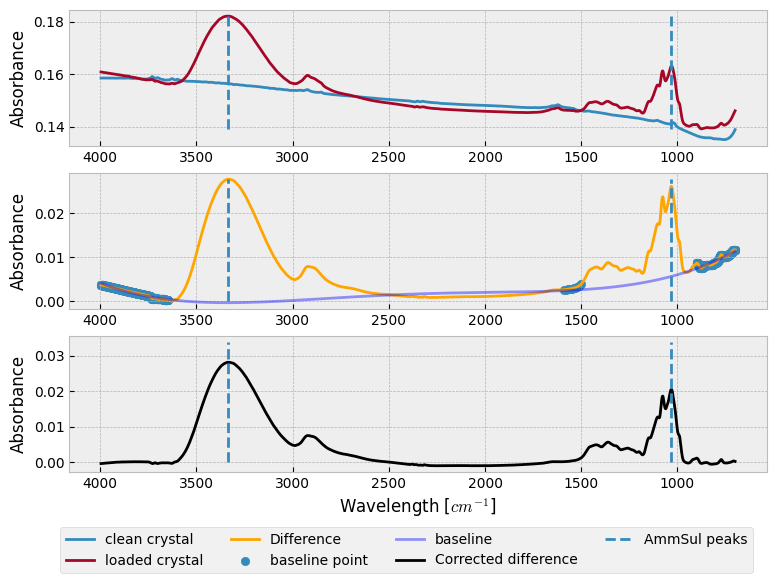

In [7]:
# Case glucose special
All_Absorbance_Analysis(excel_file=exp_excel_filename,
                        data_path=FTIR_folder_path,
                        output_folder=output_folder,
                        peak_locations=[1010, 3200],
                        peak_height=0.001, distance_between_peaks=200,
                        baseline_range = [1600, 2500],
                        fix_baseline_cuts = [900, 3650],
                        baseline_points = np.arange(1500, 1600, 10),
                        base_index_calculation = False,
                        baseline_deg = 4)

# Old version (not adapted)
#All_Absorbance_Analysis(excel_file=exp_excel_filename, data_path=FTIR_folder_path, output_folder=output_folder, peak_locations=[1010, 3200], peak_height=0.01, distance_between_peaks=200)#

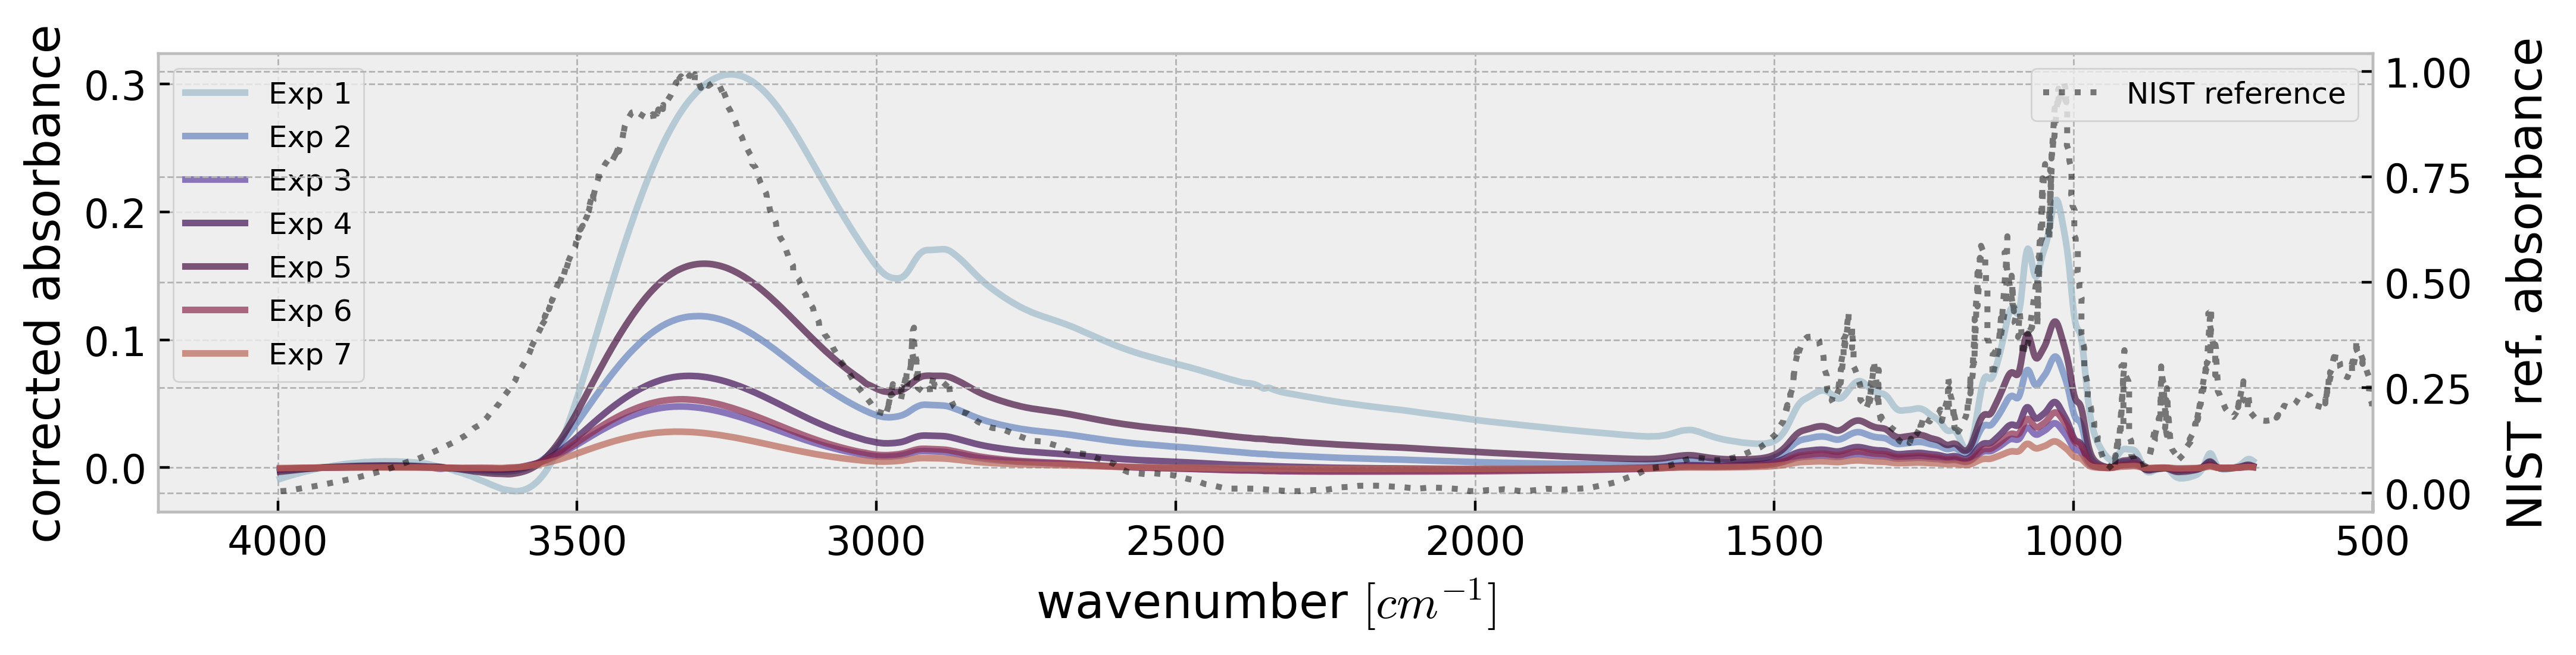

True

In [11]:
nist_file = os.path.join("Data","NIST", "glucose.csv")
ShoowAllCorrectedAbsorbances(excel_datafrane=exp_excel, output_folder_path=output_folder, nist_filepath=nist_file)

# Computation of the measure related to absorbance

In [10]:
# TO run to update the computed value
data_dict = Particles2Absorbances(exp_excel, data_path=data_path, output_folder=output_folder)

Relative patch area ratio:0.6490987612654561 and diameter 20.463933073043943
Relative patch area ratio:0.6480594667053846 and diameter 20.4475437532151
Relative patch area ratio:0.39365282629981807 and diameter 15.936406665732104
Relative patch area ratio:0.6490987612654561 and diameter 20.463933073043943
Relative patch area ratio:0.3916037571584484 and diameter 15.894875902892245
Relative patch area ratio:0.4023838058243739 and diameter 16.112167332970852
Relative patch area ratio:0.4745495398333476 and diameter 17.497439273187446


In [7]:
# TO run to get the values
aerial_density_json_filepath = os.path.join(output_folder, "ParticlesAndAbsorbances.json")
if not os.path.exists(aerial_density_json_filepath):
    raise NotADirectoryError(f"json file not valid directory: {aerial_density_json_filepath}")

with open(aerial_density_json_filepath) as json_file:
    data_dict = json.load(json_file)

Masses = np.array(data_dict["Masses"])
Masses_error = np.array(data_dict["Masses_error"])
N_as = np.array(data_dict["N_as"])
N_as_error = np.array(data_dict["N_as_error"])
Exps = np.array(data_dict["Exps"])

peaks_wv = np.loadtxt(os.path.join(output_folder,"PeaksWavelengthsArray.csv"), delimiter=',')
peaks_abs = np.loadtxt(os.path.join(output_folder, "PeaksAbsorbanceArray.csv"), delimiter=',')

# Full linear regression

0 Peak: 1030 cm-1: Y = 246.583*x + 1.818e-03
Molar Absorptivity : 28.5 +/- 2.4
1 Peak: 3305 cm-1: Y = 363.076*x + -2.116e-03
Molar Absorptivity : 41.9 +/- 3.5


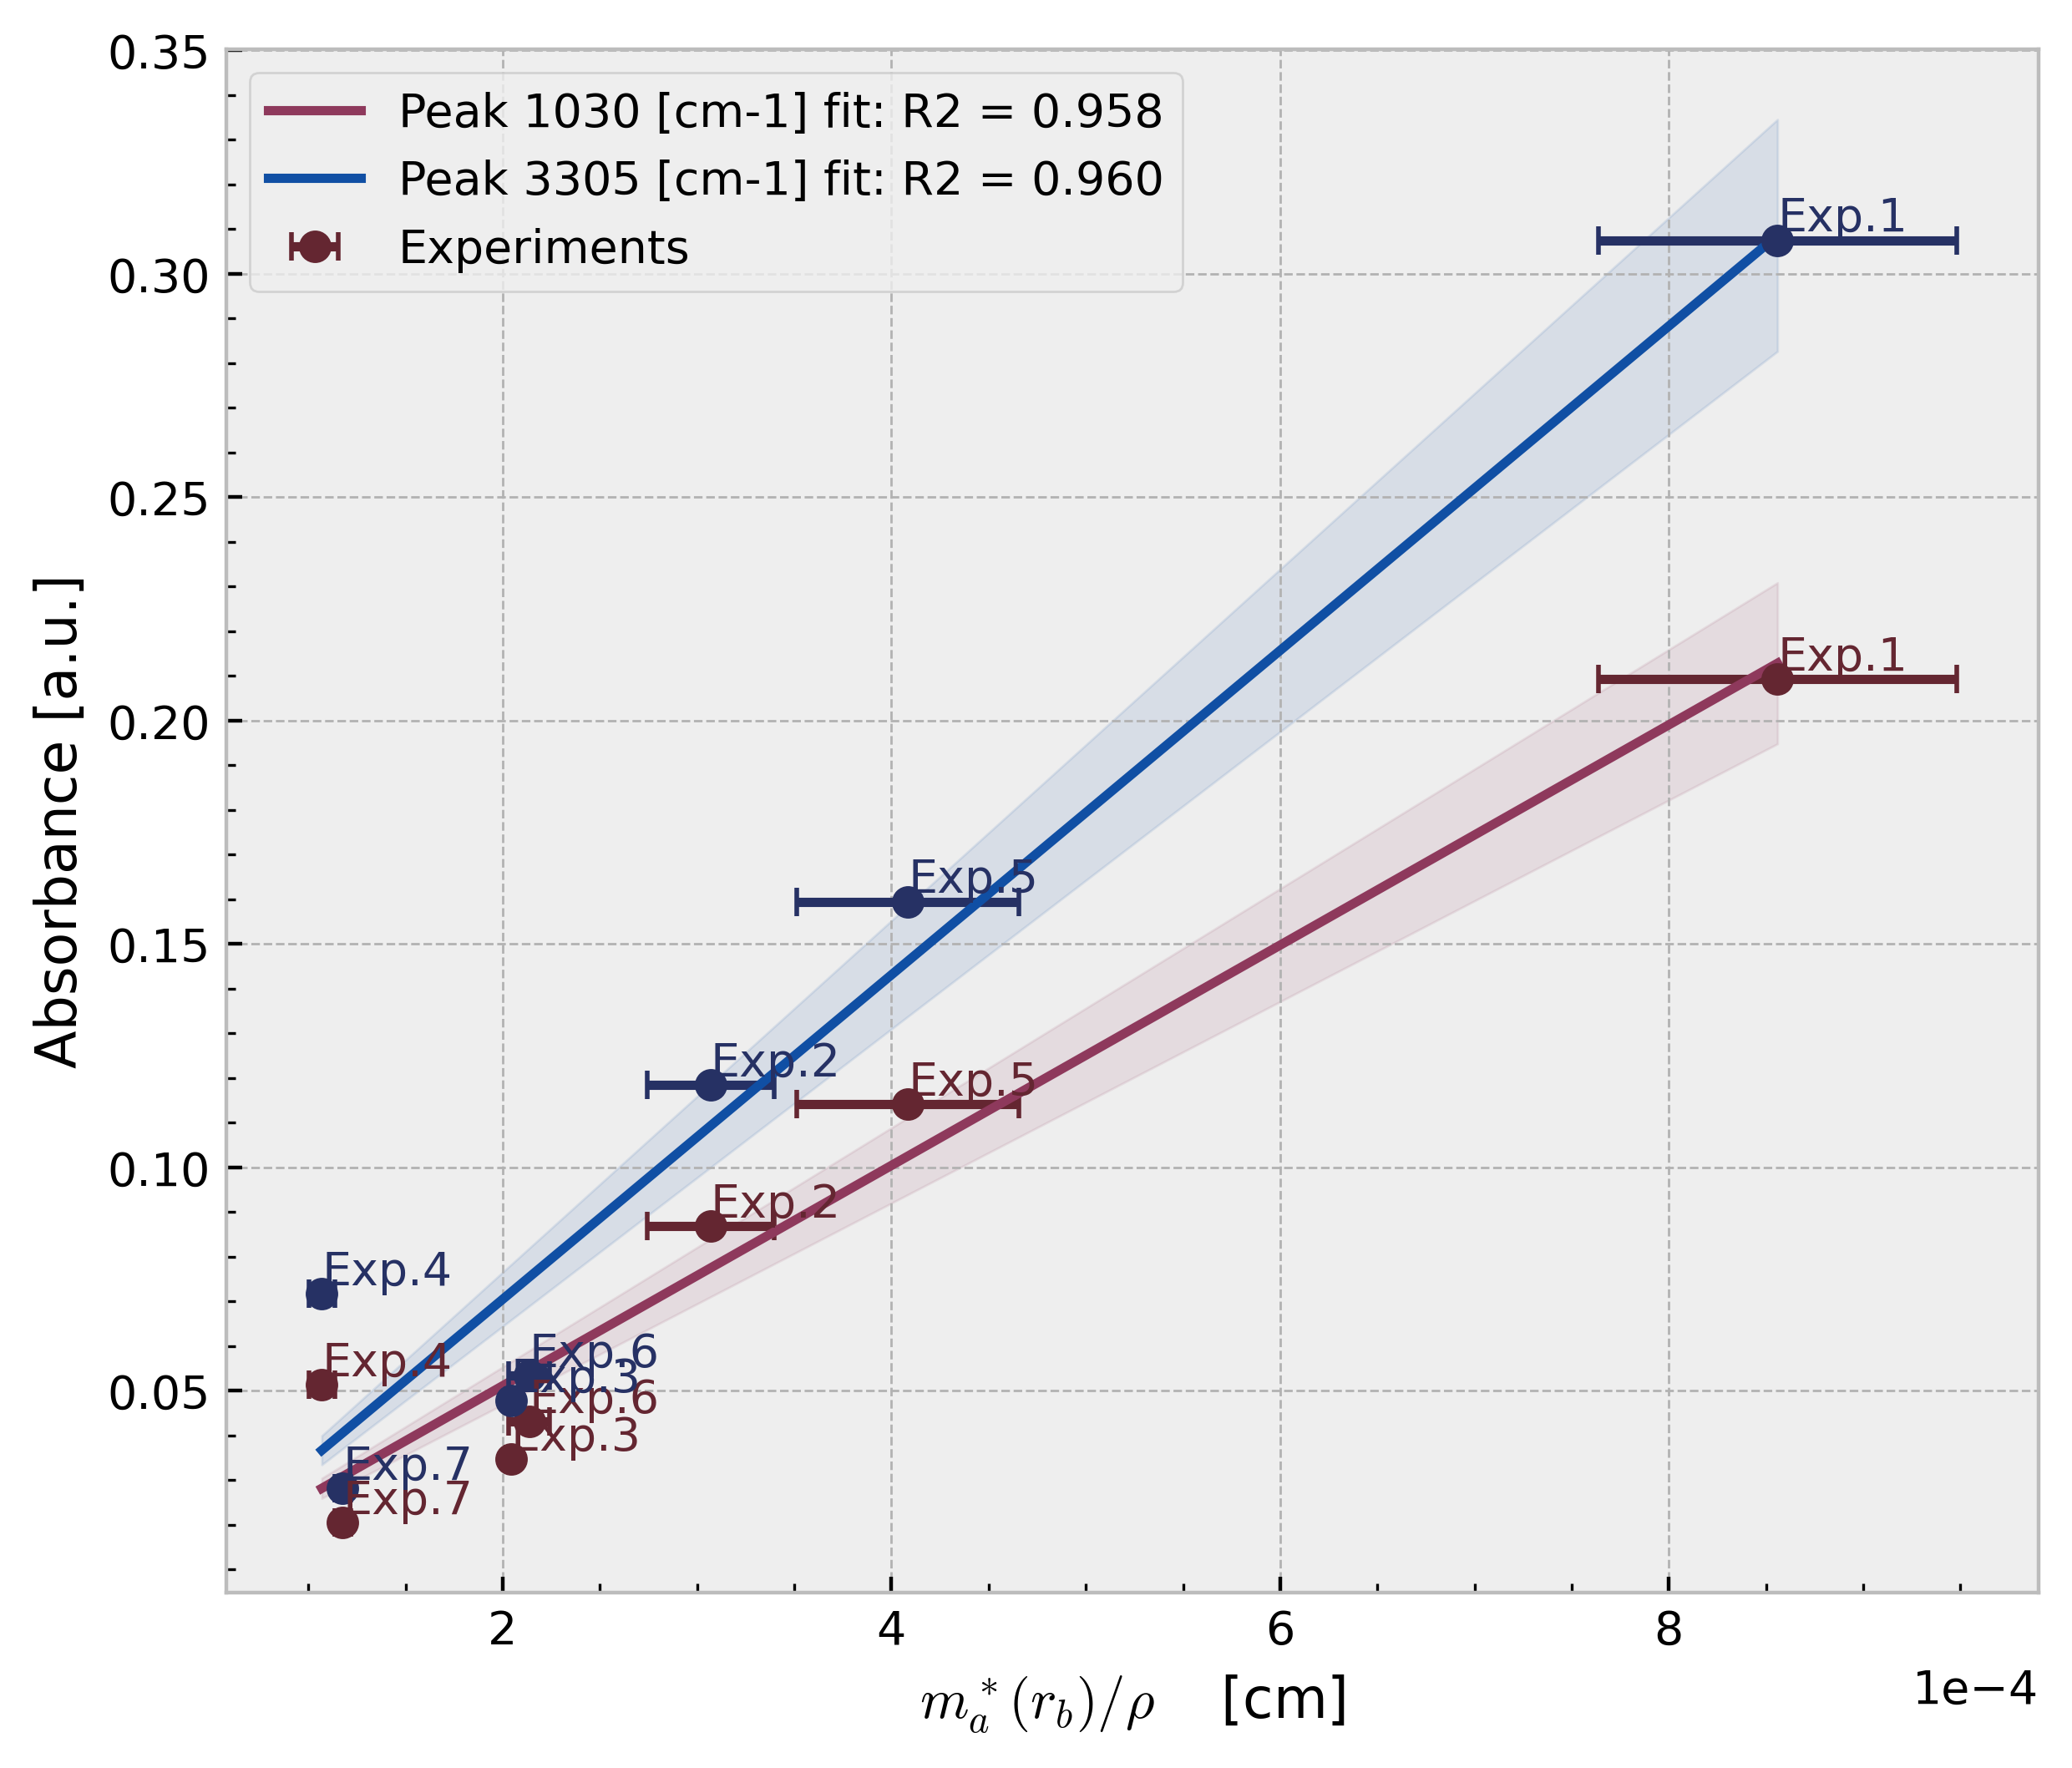

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Input data with errors
x_data =N_as# Estimated thickness with errors
x_ref = np.linspace(np.min(x_data), np.max(x_data), 100) # some more values to fit regression
x_error = N_as_error # Error in x-axis measurements

colors_list  = ['#8e395c', '#104fa4', '#5c8e39']
colors_errorbars = ["#642631", "#263164", "#316426"]


# Linear regression for y_data i 
fig, ax = plt.subplots(1,1,figsize=(7,6))
for peak_num in range(peaks_wv.shape[1]):
    #print(f"Peak .... {peak_num}")
    peak_i = np.mean(peaks_wv[:,peak_num])
    y_data = peaks_abs[:,peak_num]

    slope, intercept, r_value, p_value, std_err = linregress(np.append(x_data,0), np.append(y_data,0))
    print(f"{peak_num} Peak: {peak_i:.0f} cm-1: Y = {slope:.3f}*x + {intercept:.3e}")
    y_fit = slope * x_ref + intercept
    y_error_min = y_fit - std_err * x_ref
    y_error_max = y_fit + std_err * x_ref

    # Experiments
    if peak_num == 0:
        plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o', label='Experiments', color = colors_errorbars[peak_num])
    else : 
        plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o', color = colors_errorbars[peak_num])
    # Annotation
    if peak_num != 2:
        for i,exp in enumerate(Exps):
            plt.annotate('Exp.'+str(exp),[1*x_data[i],0.002 + y_data[i]], xycoords = 'data', color = colors_errorbars[peak_num])
    # Linear regression
    plt.plot(x_ref, y_fit,label=f'Peak {peak_i:.0f} [cm-1] fit: R2 = {r_value**2:.3f}', color = colors_list[peak_num] )
    #plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
    #plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
    plt.fill_between(x_ref, y_fit - std_err * x_ref, y_fit + std_err * x_ref, color = colors_list[peak_num], alpha=0.1)


    MolarMass = exp_excel["M"].unique()[-1]
    rho = exp_excel["rho"].unique()[-1]

    MeasAttenuationCoeff_1 = slope * MolarMass / rho / 1000
    MeasStd_1 = std_err * MolarMass / rho / 1000
    #print(f"{intercept:.1e}")
    print(f"molar absorption coefficient : {MeasAttenuationCoeff_1:.1f} +/- {MeasStd_1:.1f}")
    
plt.minorticks_on()
plt.grid(True, which="major")
#plt.grid(True, which='major', linestyle = '-', )
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()

plt.savefig(os.path.join(output_folder,f"LinReg_peaks_all.png"), dpi=200, bbox_inches='tight')
plt.show()

# Peaks median and deviation

In [14]:
m_peak1, std_peak1= np.median(peaks_wv[:,0]), np.std(peaks_wv[:,0])
m_peak2, std_peak2 = np.median(peaks_wv[:,1]), np.std(peaks_wv[:,1])
print(m_peak1, std_peak1, std_peak1/m_peak1 * 100)
print(m_peak2, std_peak2, std_peak2/m_peak2 * 100)

1029.93389 1.3498184421133683 0.1310587461214009
3313.53262 30.248204655300192 0.9128687755396291


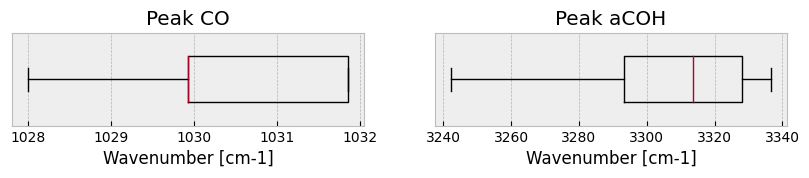

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10,1.2))

axs[0].boxplot(peaks_wv[:,0],vert = False, widths=0.5)
axs[0].set_title(f"Peak CO")
axs[0].set_xlabel("Wavenumber [cm-1]")
axs[0].set_yticks([])
axs[1].boxplot(peaks_wv[:,1], vert = False, widths=0.5)
axs[1].set_title(f"Peak aCOH")
axs[1].set_xlabel(f"Wavenumber [cm-1]")
axs[1].set_yticks([])

plt.savefig(os.path.join(output_folder, f"Boxplot_Glucose.png"), dpi=200, bbox_inches='tight')